Input: 
- road segments (to be decided how big, probably multiple bridges per segments)
- Traffic density per type of transport (3, decided in Simio) per segment
- Broken bridges per segment
- Average travel time in segment per type of transport

Output:
- stacked graph of traffic density
- heatmap of traffic density --> perhaps better to take average travel time??
- broken bridges per segment (include type only in table, not graph)

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
%matplotlib inline


In [2]:
# Define which data you (the user) wants to visualise

roadId = input('Please write the Road ID: ')


Please write the Road ID: N1


In [95]:
# Plot overall vulnerability, Condition of bridge(s) and traffic density per type of truck

def plot_traffic_density(segments,HeavyTrucks,MediumTrucks,SmallTrucks,Economic,broken_bridges):
    
    number_segments = len(segments)
    x = np.arange(number_segments)
    y1 = np.ones(number_segments)
    y2 = np.array(HeavyTrucks)
    y3 = np.array(MediumTrucks)
    y4 = np.array(SmallTrucks)
    y5 = np.array(broken_bridges)
    
    xmin = x.min()
    xmax = x.max()
    
    stacked1 = []
    for i in range(len(y2)):
        stacked = y2[i]+y3[i]
        stacked1.append(stacked)
        
    stacked2 = []
    for i in range(len(y4)):
        stacked = y4[i] + stacked1[i]
        stacked2.append(stacked)
    
    ymin = 0    
    ymax = max(stacked2)
    
    y5max = y5.max()
    
    width = 1
    
    # Two subplots, the axes array is 1-d
    fig = plt.figure(figsize=(15, 8))
    gs = gridspec.GridSpec(3, 1, height_ratios=[5,1,3])     
    
    ax0 = plt.subplot(gs[0])
    ax0.fill_between(x, 0, y2, label = 'HeavyTrucks', color = 'blue')
    ax0.fill_between(x, y2, stacked1, label = 'MediumTrucks', color = 'blue', alpha = 0.7)
    ax0.fill_between(x, stacked1, stacked2, label = 'SmallTrucks', color = 'blue', alpha= 0.4)
 
    ax1 = plt.subplot(gs[1])
    p1 = ax1.hexbin(x, y1, Economic, gridsize=number_segments-1, cmap='RdYlGn_r')

    ax2 = plt.subplot(gs[2])
    p2 = ax2.bar(x, y5, width = 1, color='black', label = 'Broken bridges', align = 'edge')
    
    # Set titles of subplots
    ax0.set_title('Traffic density [number of trucks per lane per day]')
    ax1.set_title('Traffic density') # eventueel vervangen door average travel time per segment
    ax2.set_title('Broken bridges') 
    
    # Change layout
    fig.subplots_adjust(hspace=0.25, left=0.07, right=0.93)
    
    ax0.axis([xmin, xmax, 0, ymax+10])
    ax0.get_xaxis().set_visible(False)
    ax0.legend()
    
    ax1.axis([xmin, xmax, 0.9999, 1.0001])
    ax1.get_yaxis().set_visible(False)
    ax1.set_frame_on(True)
    ax1.get_xaxis().set_visible(False)

    ax2.axis([xmin, xmax, 0,y5max])
    ax2.get_xaxis().set_visible(True)
    ax2.set_frame_on(True)
    ax2.get_yaxis().set_ticks([0,y5max])
                         
    # Set xlabel for graphs
    plt.xlabel('Chainage')
    if number_segments <= 150:
        plt.xticks(x,road_segments,rotation='vertical')

    # Colorbar for Total vulnerability graph    
    cb = fig.colorbar(p1, ax=ax2, orientation='horizontal', pad=0.6)
    cb.set_label('Traffic density') # replace?


In [101]:
# make dataframe with top 10 most vulnerable road_segments (detailed traffic data)

def show_most_dense(bridges_df,traffic_df):
    combined_df = pd.merge(bridges_df, traffic_df, on="chainage", how="outer")
    highest_density = combined_df.sort_values(by='total', ascending=False)
    highest_density2 = highest_density.drop(['Unnamed: 0_x','LRPName_x','TrafficEconomicVulnerability',
                                'utility','car','autoRickshaw','motorcycle','bicycle','cycleRickshaw','cart',
                                'totalMotorized','totalNonMotorized','road_x','Unnamed: 0_y','road_y','LRPName_y',
                                'nrLanes','largeBus','mediumBus','microBus','NumberOfABridges','NumberOfBBridges',
                                'NumberOfCBridges','BridgeFailureLikelihood','TrafficSocialVulnerability',
                                'TotalSocialVulnerability','Latitude','Longitude','TotalEconomicVulnerability'], axis=1)
    highest_density2.index = [np.arange(len(highest_density2))]
    highest_density2.columns = ['RoadChainage','BrokenBridges','HeavyTruckDensity','MediumTruckDensity',
                                'SmallTruckDensity','TotalTrafficDensity']
    top10 = highest_density2.ix[0:10]
    return(top10)

The dataframe below shows the top 10 most vulnerable road segments of road N1.


,RoadChainage,BrokenBridges,HeavyTruckDensity,MediumTruckDensity,SmallTruckDensity,TotalTrafficDensity
0,269.199,0.0,3.000000,147.625000,110.250000,1853.250000
1,273.008,0.0,3.000000,147.625000,110.250000,1853.250000
2,280.299,0.0,3.000000,147.625000,154.625000,1853.250000
3,12.688,0.0,12.111111,347.555556,248.111111,1795.111111
4,299.434,0.0,5.250000,295.500000,154.625000,1717.750000
5,286.631,0.0,2.875000,98.250000,154.625000,1717.750000
6,292.426,0.0,2.875000,98.250000,154.625000,1717.750000
7,296.135,0.0,2.875000,98.250000,154.625000,1717.750000
8,338.859,0.0,4.875000,126.125000,68.625000,1585.625000
9,303.782,0.0,5.250000,295.500000,151.875000,1577.875000


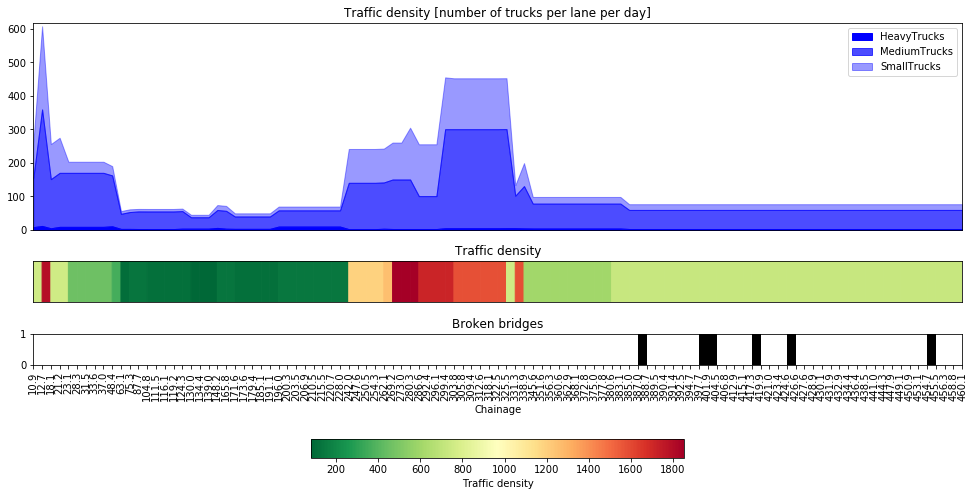

In [102]:
# Depending on the choices made by the user, select the right csv file and data

data = pd.read_csv('vulnerabilitypersegment'+str(roadId)+'.csv') # prob. different file
broken_bridges = data['NumberOfDBridges'].tolist()  #needs to be replaced with real data of the broken bridges!!!
traffic = pd.read_csv('trafficpersegment'+str(roadId)+'.csv')
    
HeavyTrucks = traffic['heavyTruck'].tolist() # this and below needs to be replaced with different types!!!
MediumTrucks = traffic['mediumTruck'].tolist()
SmallTrucks = traffic['smallTruck'].tolist()

traffic_density = traffic['total'].tolist()
chainage = traffic['chainage'].tolist()

road_segments = []
for segment in chainage:
    round_segment = round(segment,1)
    road_segments.append(round_segment)

# Based on user choices, define what visualisations to make    

plot_traffic_density(road_segments,HeavyTrucks,MediumTrucks,SmallTrucks,traffic_density,
                            broken_bridges)

OutputDF = show_most_dense(data,traffic)  

print('The dataframe below shows the top 10 most vulnerable road segments of road '+str(roadId)+'.')
OutputDF        